# Libraries

In [1]:
import sys
sys.path.insert(1, 'd:/GitHub/speech-emotion-recognition-system')   # caution: path[0] is reserved for script path (or '' in REPL)

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training
from sklearn import linear_model
from sklearn import metrics
import copy
from mv_utils import lasso_rank, LDA_LOSO_eval
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Loading Dataset

In [2]:
X, y, ID = data_loader.load_dataset(X_path='../data/2023-11-08/feature_mfcc_34_delta_delta_nfft_4096.csv', 
                                    y_path='../data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_4096.csv',
                                    ID_path='../data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_4096.csv') 

data loaded in 0.250978946685791ms
          0         1         2         3         4         5         6  \
0  0.327805 -0.464719 -0.540320 -0.983787 -1.276392 -0.517576 -0.059207   
1 -0.483202 -0.287426  0.073267 -0.259939 -1.043461  0.220426 -0.243781   
2 -0.982079  1.092156 -0.237941 -0.002997 -0.934974  0.313563  0.708375   
3  0.968642 -1.604765 -0.123183 -0.789169 -1.783557 -0.222486 -0.352760   
4  0.548607 -1.485735 -0.842989 -0.959707 -1.563772 -0.373401 -0.273213   

          7         8         9  ...       296       297       298       299  \
0 -1.325718 -0.865250 -1.400271  ... -0.000500  0.245232  0.467592  0.179897   
1 -0.745799 -0.558315 -0.667095  ...  0.081401 -0.156604  0.054227  1.335473   
2  0.392641 -0.112142 -0.675854  ...  1.159202 -0.281807  0.370446  0.969862   
3 -1.354752 -0.871037 -0.944073  ... -0.582348  1.606737 -1.213523  0.283672   
4 -1.374351 -0.530736 -0.333489  ... -0.312877 -1.016252 -0.713702  0.537837   

        300       301       302  

## Full cycle of feature selection

Iter #70: 0.743 <-> 0.743
Withdraw feature #39, added accracy 0.0
NEW ROUND
Iter #9: 0.744 <-> 0.743
Iter #41: 0.743 <-> 0.743
Iter #50: 0.743 <-> 0.743
Iter #69: 0.743 <-> 0.743
Iter #71: 0.744 <-> 0.743
Withdraw feature #9, added accracy 0.0004006410256409687
NEW ROUND
Iter #15: 0.744 <-> 0.744
Iter #33: 0.744 <-> 0.744
Iter #39: 0.744 <-> 0.744
Iter #40: 0.744 <-> 0.744
Iter #49: 0.744 <-> 0.744
Iter #69: 0.744 <-> 0.744
Iter #70: 0.745 <-> 0.744
Iter #85: 0.745 <-> 0.744
Withdraw feature #70, added accracy 0.0008012820512820484
NEW ROUND
Iter #33: 0.745 <-> 0.745
Iter #39: 0.745 <-> 0.745
Iter #40: 0.745 <-> 0.745
Iter #84: 0.745 <-> 0.745
Withdraw feature #33, added accracy 0.0
NEW ROUND
Iter #38: 0.745 <-> 0.745
Iter #39: 0.745 <-> 0.745
Withdraw feature #38, added accracy 0.0
NEW ROUND
Iter #38: 0.745 <-> 0.745
Withdraw feature #38, added accracy 0.0
NEW ROUND
Iter #46: 0.745 <-> 0.745
Iter #81: 0.745 <-> 0.745
Withdraw feature #46, added accracy 0.00040064102564107973
NEW ROUND

100%|██████████| 5/5 [00:00<00:00, 33.98it/s]


UAR = 0.419


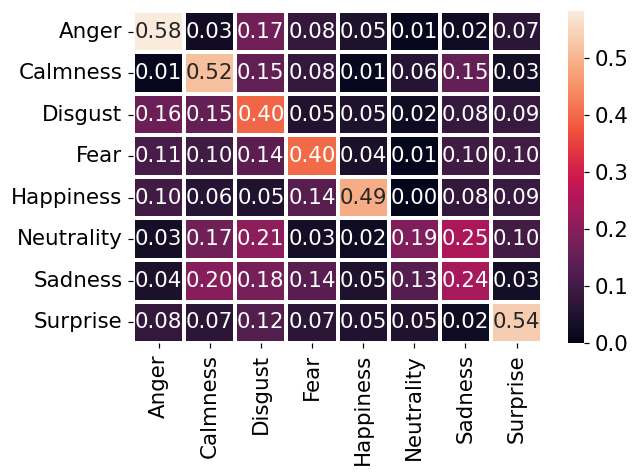

Saving confusion matrix with name:  confusion_matrix_LDA_rev_happy_uar_0.419.jpg


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+02, tolerance: 3.584e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:07<23:47,  7.17s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+02, tolerance: 3.584e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:16<27:29,  8.33s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordina

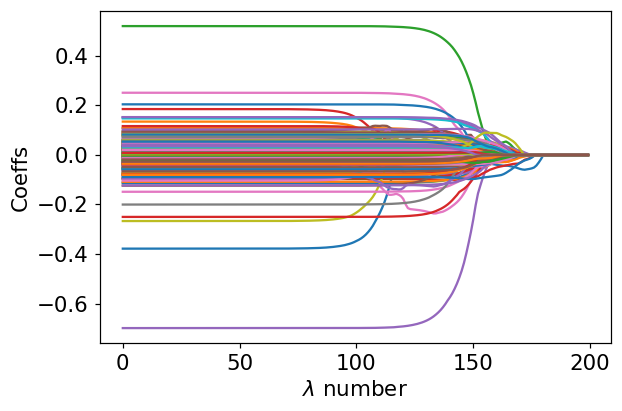

  1%|          | 3/306 [00:00<00:10, 29.07it/s]

Iter =  1  AUC = 0.5000
Iter =  5  AUC = 0.5052


  3%|▎         | 9/306 [00:00<00:15, 19.45it/s]

Iter =  6  AUC = 0.5089
Iter =  7  AUC = 0.5123
Iter =  8  AUC = 0.5126
Iter =  9  AUC = 0.5179


  4%|▍         | 12/306 [00:00<00:18, 15.61it/s]

Iter =  12  AUC = 0.5234
Iter =  13  AUC = 0.5331


  5%|▍         | 14/306 [00:00<00:21, 13.46it/s]

Iter =  14  AUC = 0.5487


  5%|▌         | 16/306 [00:01<00:25, 11.53it/s]

Iter =  16  AUC = 0.5536
Iter =  17  AUC = 0.5636


  6%|▌         | 18/306 [00:01<00:29,  9.89it/s]

Iter =  18  AUC = 0.5640
Iter =  19  AUC = 0.5647


  8%|▊         | 23/306 [00:02<00:38,  7.43it/s]

Iter =  22  AUC = 0.5740
Iter =  23  AUC = 0.5751


 10%|▉         | 30/306 [00:03<00:56,  4.88it/s]

Iter =  30  AUC = 0.5960


 10%|█         | 32/306 [00:04<01:02,  4.39it/s]

Iter =  32  AUC = 0.6001


 11%|█         | 34/306 [00:04<01:03,  4.31it/s]

Iter =  34  AUC = 0.6161


 13%|█▎        | 41/306 [00:06<01:12,  3.66it/s]

Iter =  41  AUC = 0.6298


 15%|█▍        | 45/306 [00:07<01:19,  3.27it/s]

Iter =  45  AUC = 0.6317


 16%|█▌        | 49/306 [00:09<01:27,  2.92it/s]

Iter =  49  AUC = 0.6455


 17%|█▋        | 51/306 [00:09<01:30,  2.82it/s]

Iter =  51  AUC = 0.6763


 18%|█▊        | 54/306 [00:10<01:35,  2.65it/s]

Iter =  54  AUC = 0.6771


 21%|██        | 65/306 [00:15<01:50,  2.17it/s]

Iter =  65  AUC = 0.6797


 22%|██▏       | 66/306 [00:16<01:52,  2.13it/s]

Iter =  66  AUC = 0.6801


 22%|██▏       | 68/306 [00:17<01:59,  1.99it/s]

Iter =  68  AUC = 0.6808


 26%|██▌       | 80/306 [00:24<02:14,  1.68it/s]

Iter =  80  AUC = 0.6838


 27%|██▋       | 83/306 [00:26<02:18,  1.61it/s]

Iter =  83  AUC = 0.6890


 29%|██▉       | 89/306 [00:30<02:27,  1.48it/s]

Iter =  89  AUC = 0.6946


 29%|██▉       | 90/306 [00:30<02:28,  1.46it/s]

Iter =  90  AUC = 0.7005


 30%|███       | 93/306 [00:33<02:34,  1.38it/s]

Iter =  93  AUC = 0.7016


100%|██████████| 306/306 [08:02<00:00,  1.58s/it]


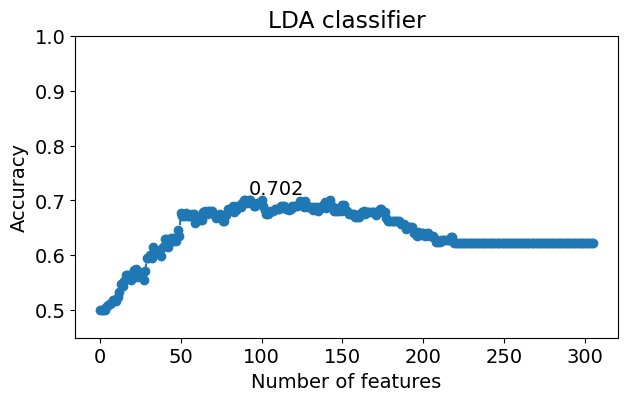

auc_best = 0.70163690
best auc (LDA) =  0.7016369047619048 Number of features =  92
NEW ROUND
Iter #5: 0.702 <-> 0.702
Iter #8: 0.702 <-> 0.702
Iter #12: 0.702 <-> 0.702
Iter #13: 0.702 <-> 0.702
Iter #18: 0.715 <-> 0.702
Iter #19: 0.706 <-> 0.702
Iter #23: 0.702 <-> 0.702
Iter #27: 0.702 <-> 0.702
Iter #29: 0.716 <-> 0.702
Iter #34: 0.702 <-> 0.702
Iter #35: 0.702 <-> 0.702
Iter #37: 0.707 <-> 0.702
Iter #39: 0.707 <-> 0.702
Iter #41: 0.702 <-> 0.702
Iter #52: 0.702 <-> 0.702
Iter #58: 0.712 <-> 0.702
Iter #63: 0.702 <-> 0.702
Iter #70: 0.702 <-> 0.702
Iter #72: 0.706 <-> 0.702
Iter #73: 0.702 <-> 0.702
Iter #74: 0.707 <-> 0.702
Iter #75: 0.702 <-> 0.702
Iter #80: 0.702 <-> 0.702
Iter #83: 0.702 <-> 0.702
Iter #85: 0.707 <-> 0.702
Iter #86: 0.702 <-> 0.702
Iter #87: 0.711 <-> 0.702
Iter #89: 0.702 <-> 0.702
Iter #90: 0.702 <-> 0.702
Iter #91: 0.706 <-> 0.702
Withdraw feature #29, added accracy 0.014136904761904767
NEW ROUND
Iter #9: 0.716 <-> 0.716
Iter #16: 0.716 <-> 0.716
Iter #17: 

100%|██████████| 5/5 [00:00<00:00, 41.81it/s]


UAR = 0.438


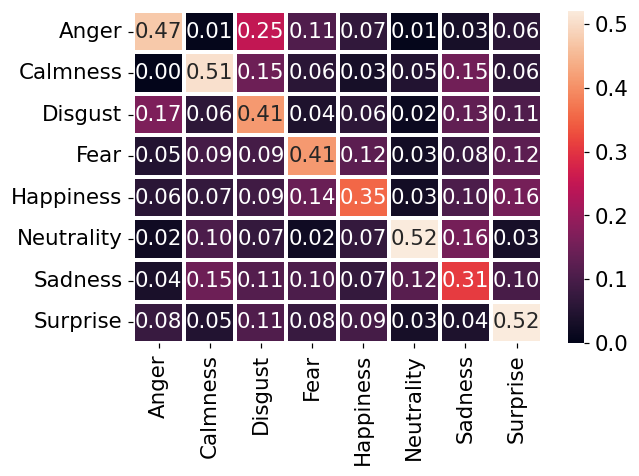

Saving confusion matrix with name:  confusion_matrix_LDA_rev_neutral_uar_0.438.jpg


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:06<22:49,  6.88s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:14<23:12,  7.03s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordina

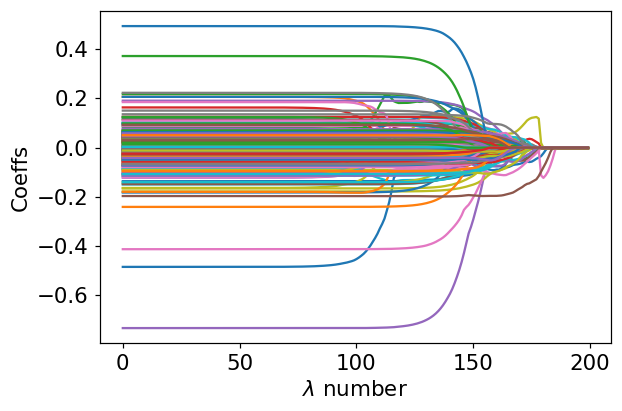

  1%|          | 3/306 [00:00<00:13, 22.15it/s]

Iter =  1  AUC = 0.5379
Iter =  2  AUC = 0.6088
Iter =  3  AUC = 0.6755
Iter =  4  AUC = 0.6825
Iter =  5  AUC = 0.6941


  2%|▏         | 6/306 [00:00<00:14, 21.14it/s]

Iter =  6  AUC = 0.7035
Iter =  9  AUC = 0.7081


  4%|▎         | 11/306 [00:00<00:18, 16.14it/s]

Iter =  10  AUC = 0.7224
Iter =  12  AUC = 0.7350


  4%|▍         | 13/306 [00:00<00:20, 13.97it/s]

Iter =  13  AUC = 0.7380
Iter =  14  AUC = 0.7480


  8%|▊         | 26/306 [00:02<00:44,  6.27it/s]

Iter =  26  AUC = 0.7494
Iter =  27  AUC = 0.7546


  9%|▉         | 28/306 [00:03<00:48,  5.73it/s]

Iter =  28  AUC = 0.7580


  9%|▉         | 29/306 [00:03<00:51,  5.39it/s]

Iter =  29  AUC = 0.7592


 10%|█         | 32/306 [00:04<01:02,  4.38it/s]

Iter =  32  AUC = 0.7666


 12%|█▏        | 38/306 [00:05<01:16,  3.49it/s]

Iter =  38  AUC = 0.7827


 13%|█▎        | 39/306 [00:06<01:16,  3.48it/s]

Iter =  39  AUC = 0.7845


 13%|█▎        | 40/306 [00:06<01:15,  3.52it/s]

Iter =  40  AUC = 0.7849


 15%|█▌        | 46/306 [00:08<01:22,  3.16it/s]

Iter =  46  AUC = 0.7899


 15%|█▌        | 47/306 [00:08<01:24,  3.07it/s]

Iter =  47  AUC = 0.7961


 16%|█▋        | 50/306 [00:09<01:34,  2.71it/s]

Iter =  50  AUC = 0.7967


 19%|█▉        | 58/306 [00:13<01:43,  2.40it/s]

Iter =  58  AUC = 0.8007


 22%|██▏       | 68/306 [00:17<01:58,  2.01it/s]

Iter =  68  AUC = 0.8019


 26%|██▋       | 81/306 [00:25<02:19,  1.62it/s]

Iter =  81  AUC = 0.8069


 27%|██▋       | 82/306 [00:26<02:21,  1.58it/s]

Iter =  82  AUC = 0.8087


 29%|██▉       | 88/306 [00:30<02:29,  1.46it/s]

Iter =  88  AUC = 0.8103


 32%|███▏      | 97/306 [00:37<02:47,  1.25it/s]

Iter =  97  AUC = 0.8139


100%|██████████| 306/306 [08:03<00:00,  1.58s/it]


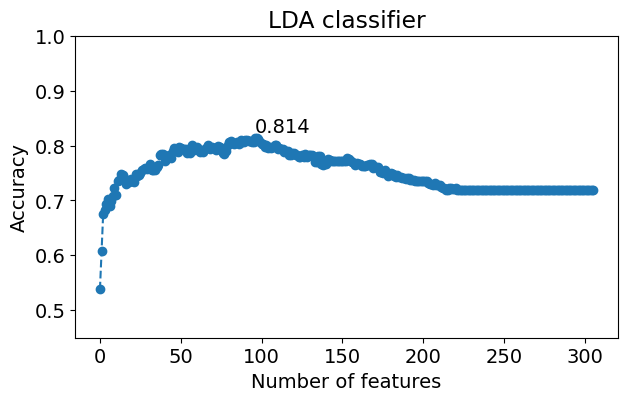

auc_best = 0.81390224
best auc (LDA) =  0.8139022435897436 Number of features =  96
NEW ROUND
Iter #5: 0.820 <-> 0.814
Iter #23: 0.814 <-> 0.814
Iter #34: 0.817 <-> 0.814
Iter #59: 0.814 <-> 0.814
Iter #70: 0.814 <-> 0.814
Iter #72: 0.817 <-> 0.814
Iter #90: 0.817 <-> 0.814
Iter #94: 0.817 <-> 0.814
Iter #95: 0.814 <-> 0.814
Withdraw feature #5, added accracy 0.005608974358974339
NEW ROUND
Iter #37: 0.820 <-> 0.820
Iter #39: 0.822 <-> 0.820
Iter #51: 0.822 <-> 0.820
Iter #54: 0.822 <-> 0.820
Iter #58: 0.821 <-> 0.820
Iter #78: 0.821 <-> 0.820
Iter #80: 0.822 <-> 0.820
Iter #85: 0.820 <-> 0.820
Iter #86: 0.820 <-> 0.820
Iter #91: 0.820 <-> 0.820
Withdraw feature #39, added accracy 0.0026041666666666297
NEW ROUND
Iter #45: 0.823 <-> 0.822
Iter #49: 0.822 <-> 0.822
Iter #53: 0.823 <-> 0.822
Iter #73: 0.822 <-> 0.822
Iter #77: 0.823 <-> 0.822
Withdraw feature #45, added accracy 0.00040064102564107973
NEW ROUND
Iter #24: 0.823 <-> 0.823
Iter #52: 0.823 <-> 0.823
Iter #53: 0.823 <-> 0.823
It

100%|██████████| 5/5 [00:00<00:00, 38.65it/s]


UAR = 0.428


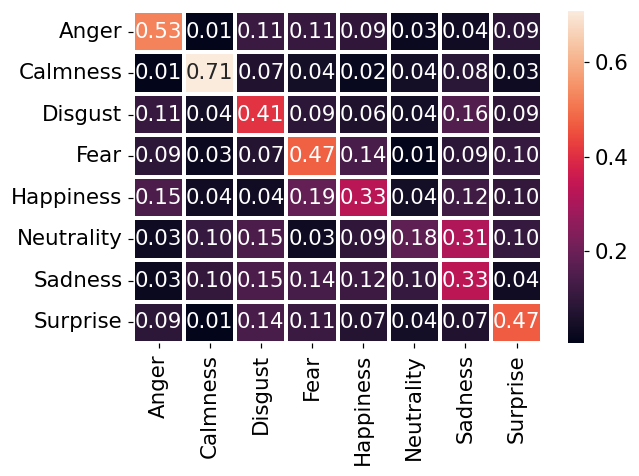

Saving confusion matrix with name:  confusion_matrix_LDA_rev_calm_uar_0.428.jpg


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:09<30:19,  9.14s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:18<30:09,  9.14s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordina

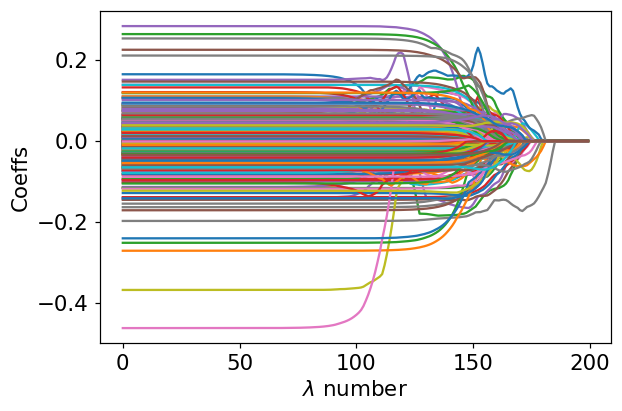

  1%|          | 3/306 [00:00<00:11, 27.27it/s]

Iter =  1  AUC = 0.5933
Iter =  2  AUC = 0.6256
Iter =  3  AUC = 0.6575
Iter =  4  AUC = 0.6863
Iter =  5  AUC = 0.7001


  4%|▍         | 13/306 [00:00<00:20, 14.08it/s]

Iter =  11  AUC = 0.7087


  7%|▋         | 20/306 [00:01<00:32,  8.69it/s]

Iter =  19  AUC = 0.7133
Iter =  20  AUC = 0.7208


  7%|▋         | 22/306 [00:02<00:37,  7.65it/s]

Iter =  22  AUC = 0.7240
Iter =  23  AUC = 0.7256


  8%|▊         | 24/306 [00:02<00:42,  6.60it/s]

Iter =  24  AUC = 0.7368


  8%|▊         | 26/306 [00:02<00:46,  5.97it/s]

Iter =  26  AUC = 0.7376
Iter =  27  AUC = 0.7498


  9%|▉         | 29/306 [00:03<00:52,  5.32it/s]

Iter =  29  AUC = 0.7506


 12%|█▏        | 36/306 [00:05<01:05,  4.13it/s]

Iter =  36  AUC = 0.7530


 15%|█▌        | 47/306 [00:08<01:22,  3.13it/s]

Iter =  47  AUC = 0.7574


 18%|█▊        | 55/306 [00:11<01:35,  2.63it/s]

Iter =  55  AUC = 0.7580


 20%|█▉        | 60/306 [00:13<01:45,  2.33it/s]

Iter =  60  AUC = 0.7586


 27%|██▋       | 82/306 [00:25<02:19,  1.60it/s]

Iter =  82  AUC = 0.7610


 29%|██▉       | 88/306 [00:29<02:29,  1.46it/s]

Iter =  88  AUC = 0.7636


 29%|██▉       | 89/306 [00:30<02:30,  1.44it/s]

Iter =  89  AUC = 0.7668


 29%|██▉       | 90/306 [00:31<02:31,  1.43it/s]

Iter =  90  AUC = 0.7728


 30%|███       | 93/306 [00:33<02:36,  1.36it/s]

Iter =  93  AUC = 0.7738


 31%|███       | 94/306 [00:34<02:38,  1.33it/s]

Iter =  94  AUC = 0.7756


100%|██████████| 306/306 [08:05<00:00,  1.59s/it]


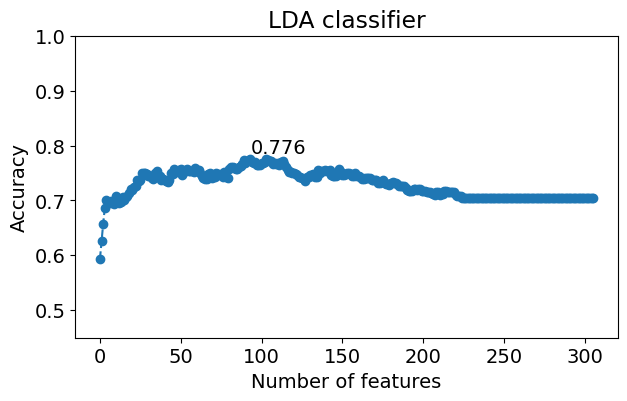

auc_best = 0.77564103
best auc (LDA) =  0.7756410256410255 Number of features =  93
NEW ROUND
Iter #3: 0.778 <-> 0.776
Iter #5: 0.779 <-> 0.776
Iter #6: 0.778 <-> 0.776
Iter #8: 0.776 <-> 0.776
Iter #14: 0.779 <-> 0.776
Iter #15: 0.776 <-> 0.776
Iter #20: 0.777 <-> 0.776
Iter #22: 0.777 <-> 0.776
Iter #24: 0.779 <-> 0.776
Iter #30: 0.777 <-> 0.776
Iter #32: 0.782 <-> 0.776
Iter #34: 0.779 <-> 0.776
Iter #35: 0.778 <-> 0.776
Iter #36: 0.776 <-> 0.776
Iter #39: 0.777 <-> 0.776
Iter #40: 0.777 <-> 0.776
Iter #42: 0.779 <-> 0.776
Iter #43: 0.778 <-> 0.776
Iter #45: 0.778 <-> 0.776
Iter #47: 0.777 <-> 0.776
Iter #48: 0.779 <-> 0.776
Iter #49: 0.778 <-> 0.776
Iter #50: 0.778 <-> 0.776
Iter #51: 0.782 <-> 0.776
Iter #52: 0.778 <-> 0.776
Iter #53: 0.781 <-> 0.776
Iter #57: 0.778 <-> 0.776
Iter #58: 0.777 <-> 0.776
Iter #59: 0.777 <-> 0.776
Iter #61: 0.776 <-> 0.776
Iter #63: 0.777 <-> 0.776
Iter #65: 0.778 <-> 0.776
Iter #66: 0.776 <-> 0.776
Iter #68: 0.779 <-> 0.776
Iter #69: 0.779 <-> 0.776


100%|██████████| 5/5 [00:00<00:00, 30.30it/s]


UAR = 0.451


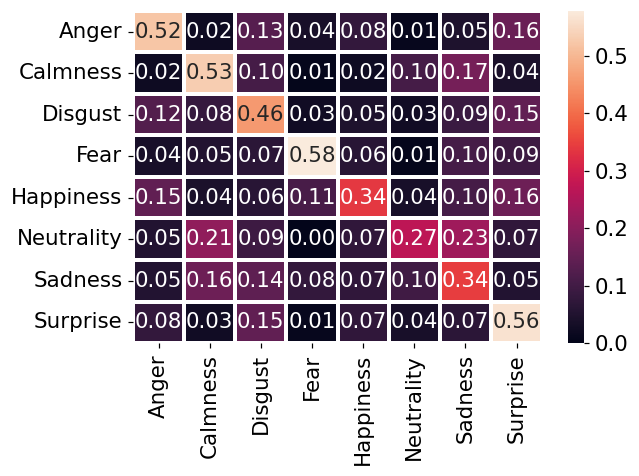

Saving confusion matrix with name:  confusion_matrix_LDA_rev_fear_uar_0.451.jpg


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:07<23:40,  7.14s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:13<22:54,  6.94s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordina

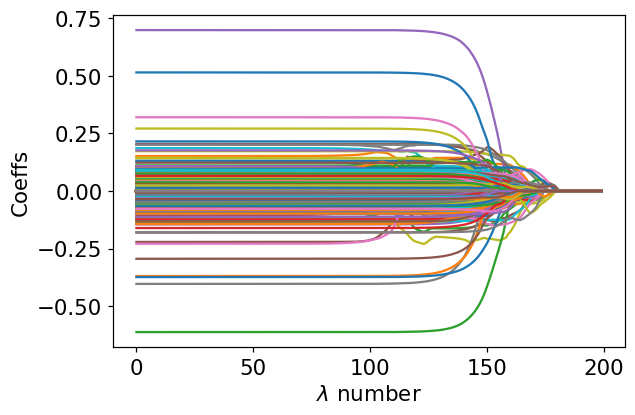

  2%|▏         | 5/306 [00:00<00:13, 21.54it/s]

Iter =  1  AUC = 0.4976
Iter =  2  AUC = 0.5172
Iter =  4  AUC = 0.5467
Iter =  5  AUC = 0.5743


  3%|▎         | 8/306 [00:00<00:15, 18.83it/s]

Iter =  6  AUC = 0.5763
Iter =  8  AUC = 0.6012


  4%|▍         | 12/306 [00:00<00:20, 14.36it/s]

Iter =  10  AUC = 0.6232


  5%|▌         | 16/306 [00:01<00:27, 10.72it/s]

Iter =  15  AUC = 0.6498


  6%|▌         | 18/306 [00:01<00:30,  9.54it/s]

Iter =  18  AUC = 0.6542
Iter =  19  AUC = 0.6673


  8%|▊         | 26/306 [00:02<00:43,  6.40it/s]

Iter =  25  AUC = 0.6691
Iter =  26  AUC = 0.6749


  9%|▉         | 27/306 [00:02<00:46,  5.94it/s]

Iter =  27  AUC = 0.6753
Iter =  28  AUC = 0.6965


  9%|▉         | 29/306 [00:03<00:51,  5.41it/s]

Iter =  29  AUC = 0.7081


 11%|█▏        | 35/306 [00:04<01:01,  4.38it/s]

Iter =  35  AUC = 0.7155


 14%|█▍        | 43/306 [00:06<01:16,  3.46it/s]

Iter =  43  AUC = 0.7316


 14%|█▍        | 44/306 [00:07<01:18,  3.35it/s]

Iter =  44  AUC = 0.7382


 22%|██▏       | 67/306 [00:16<01:54,  2.09it/s]

Iter =  67  AUC = 0.7398


 22%|██▏       | 68/306 [00:17<01:55,  2.05it/s]

Iter =  68  AUC = 0.7402


 23%|██▎       | 69/306 [00:17<01:59,  1.99it/s]

Iter =  69  AUC = 0.7446


 25%|██▌       | 78/306 [00:22<02:10,  1.74it/s]

Iter =  78  AUC = 0.7500


 27%|██▋       | 82/306 [00:25<02:18,  1.62it/s]

Iter =  82  AUC = 0.7608


100%|██████████| 306/306 [08:05<00:00,  1.59s/it]


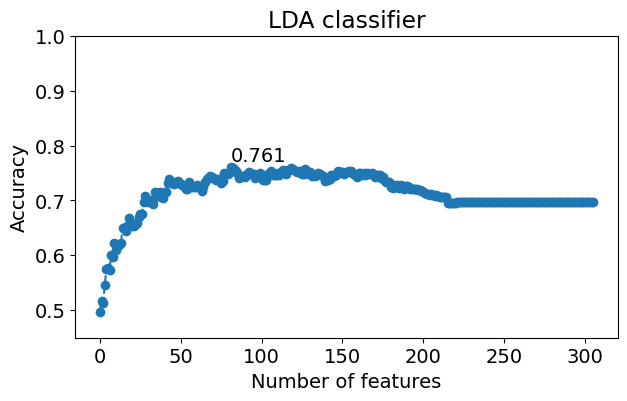

auc_best = 0.76081731
best auc (LDA) =  0.7608173076923077 Number of features =  81
NEW ROUND
Iter #7: 0.762 <-> 0.761
Iter #16: 0.761 <-> 0.761
Iter #19: 0.761 <-> 0.761
Iter #20: 0.762 <-> 0.761
Iter #25: 0.761 <-> 0.761
Iter #35: 0.762 <-> 0.761
Iter #53: 0.762 <-> 0.761
Iter #56: 0.762 <-> 0.761
Iter #61: 0.763 <-> 0.761
Iter #62: 0.764 <-> 0.761
Iter #64: 0.764 <-> 0.761
Iter #71: 0.761 <-> 0.761
Withdraw feature #62, added accracy 0.003405448717948678
NEW ROUND
Iter #42: 0.765 <-> 0.764
Iter #66: 0.766 <-> 0.764
Withdraw feature #66, added accracy 0.002203525641025661
NEW ROUND
Iter #15: 0.769 <-> 0.766
Iter #40: 0.766 <-> 0.766
Iter #43: 0.769 <-> 0.766
Iter #50: 0.766 <-> 0.766
Iter #51: 0.768 <-> 0.766
Iter #52: 0.766 <-> 0.766
Iter #55: 0.767 <-> 0.766
Iter #74: 0.772 <-> 0.766
Iter #79: 0.766 <-> 0.766
Withdraw feature #74, added accracy 0.006009615384615308
NEW ROUND
Iter #19: 0.772 <-> 0.772
Iter #43: 0.772 <-> 0.772
Iter #50: 0.772 <-> 0.772
Withdraw feature #19, added ac

100%|██████████| 5/5 [00:00<00:00, 34.94it/s]


UAR = 0.431


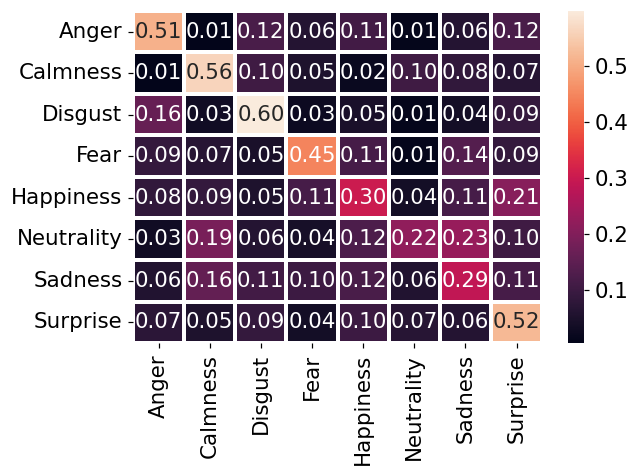

Saving confusion matrix with name:  confusion_matrix_LDA_rev_disgust_uar_0.431.jpg


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:09<30:13,  9.11s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:15<25:37,  7.76s/it]c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordina

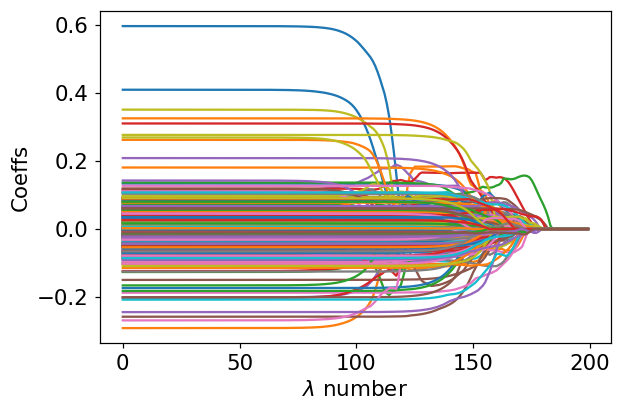

  1%|          | 3/306 [00:00<00:11, 27.27it/s]

Iter =  1  AUC = 0.5070
Iter =  2  AUC = 0.5459
Iter =  3  AUC = 0.5775
Iter =  5  AUC = 0.5901


  2%|▏         | 6/306 [00:00<00:13, 22.48it/s]

Iter =  6  AUC = 0.5927
Iter =  7  AUC = 0.6046
Iter =  8  AUC = 0.6156


  4%|▎         | 11/306 [00:00<00:18, 16.16it/s]

Iter =  9  AUC = 0.6226
Iter =  10  AUC = 0.6280
Iter =  11  AUC = 0.6400


  4%|▍         | 13/306 [00:00<00:21, 13.92it/s]

Iter =  13  AUC = 0.6404
Iter =  14  AUC = 0.6462


  5%|▍         | 15/306 [00:01<00:24, 12.00it/s]

Iter =  15  AUC = 0.6530
Iter =  16  AUC = 0.6560


  6%|▌         | 19/306 [00:01<00:30,  9.37it/s]

Iter =  18  AUC = 0.6743


  7%|▋         | 21/306 [00:01<00:33,  8.57it/s]

Iter =  20  AUC = 0.6899
Iter =  21  AUC = 0.6995


  8%|▊         | 25/306 [00:02<00:40,  6.93it/s]

Iter =  24  AUC = 0.7043


  8%|▊         | 26/306 [00:02<00:42,  6.52it/s]

Iter =  26  AUC = 0.7272


  9%|▉         | 28/306 [00:03<00:48,  5.76it/s]

Iter =  28  AUC = 0.7368


 11%|█         | 33/306 [00:04<01:02,  4.40it/s]

Iter =  33  AUC = 0.7416


 11%|█         | 34/306 [00:04<01:05,  4.13it/s]

Iter =  34  AUC = 0.7456


 12%|█▏        | 36/306 [00:05<01:06,  4.05it/s]

Iter =  36  AUC = 0.7474


 13%|█▎        | 39/306 [00:05<01:09,  3.84it/s]

Iter =  39  AUC = 0.7492


 13%|█▎        | 41/306 [00:06<01:14,  3.57it/s]

Iter =  41  AUC = 0.7624


 14%|█▎        | 42/306 [00:06<01:15,  3.49it/s]

Iter =  42  AUC = 0.7650


 14%|█▍        | 44/306 [00:07<01:18,  3.36it/s]

Iter =  44  AUC = 0.7666


 15%|█▍        | 45/306 [00:07<01:19,  3.28it/s]

Iter =  45  AUC = 0.7696


 16%|█▌        | 48/306 [00:08<01:24,  3.05it/s]

Iter =  48  AUC = 0.7738


100%|██████████| 306/306 [08:05<00:00,  1.59s/it]


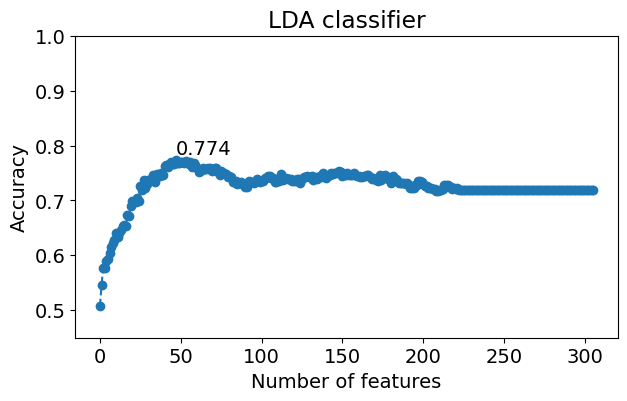

auc_best = 0.77383814
best auc (LDA) =  0.773838141025641 Number of features =  47
NEW ROUND
Iter #5: 0.775 <-> 0.774
Iter #8: 0.774 <-> 0.774
Iter #11: 0.776 <-> 0.774
Iter #20: 0.776 <-> 0.774
Iter #22: 0.775 <-> 0.774
Iter #27: 0.774 <-> 0.774
Iter #28: 0.774 <-> 0.774
Iter #31: 0.777 <-> 0.774
Iter #32: 0.775 <-> 0.774
Iter #35: 0.774 <-> 0.774
Iter #37: 0.774 <-> 0.774
Iter #38: 0.778 <-> 0.774
Iter #40: 0.778 <-> 0.774
Iter #44: 0.779 <-> 0.774
Iter #45: 0.780 <-> 0.774
Withdraw feature #45, added accracy 0.0064102564102564985
NEW ROUND
Iter #0: 0.780 <-> 0.780
Iter #15: 0.780 <-> 0.780
Iter #19: 0.780 <-> 0.780
Iter #28: 0.781 <-> 0.780
Iter #32: 0.780 <-> 0.780
Iter #41: 0.781 <-> 0.780
Iter #45: 0.781 <-> 0.780
Withdraw feature #28, added accracy 0.0008012820512820484
NEW ROUND
Iter #9: 0.783 <-> 0.781
Iter #31: 0.781 <-> 0.781
Iter #40: 0.781 <-> 0.781
Iter #44: 0.781 <-> 0.781
Withdraw feature #9, added accracy 0.00220352564102555
NEW ROUND
Iter #18: 0.783 <-> 0.783
Iter #23

100%|██████████| 5/5 [00:00<00:00, 49.85it/s]


UAR = 0.413


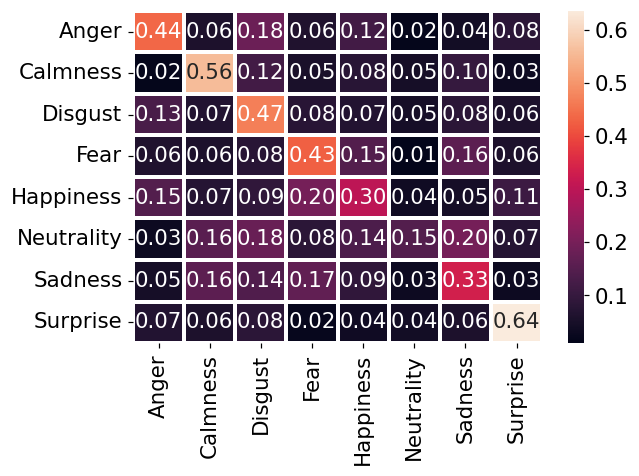

Saving confusion matrix with name:  confusion_matrix_LDA_rev_surprised_uar_0.413.jpg


In [30]:
# Emotions = ['sad']
Emotions = ['happy','neutral','calm','fear','disgust','surprised']

for Emotion_label in Emotions:
    # Relabeling and normilizing
    y_true = np.zeros((len(y)))
    y_true[np.squeeze(y.values==Emotion_label)] = 1
    y_true[y_true==0] = -1

    X_data = X.values
    X_norm = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)
    y_reg = copy.copy(y_true)

    # LASSO ranking
    Lasso_model = linear_model.Lasso()
    Npt = 200
    coeffs = np.zeros((X_norm.shape[1],Npt),dtype=np.double)
    lambda_ = np.logspace(-12.5, 0.3, Npt)
    i = 0
    for lamb in tqdm(lambda_):
        Lasso_model = linear_model.Lasso(alpha=lamb, max_iter=20000)
        Lasso_model.fit(X_norm,y_reg)
        coeffs[:,i] = Lasso_model.coef_
        i = i + 1

    plt.figure(dpi=110)
    plt.plot(coeffs.T)
    plt.xlabel('$\lambda$ number')
    plt.ylabel('Coeffs')
    plt.show()

    Rank_lasso = []
    for i in range(coeffs.shape[1]):
        withdraw_features = np.nonzero(np.abs(coeffs[:,i])<=1e-17)[0]        
        something_new = np.setdiff1d(withdraw_features, Rank_lasso)
        if len(something_new):
            for ii in range(len(something_new)):
                Rank_lasso.append(something_new[ii])        

    Rank_lasso.reverse()

    np.save(f'../data/Lasso_rev_Ranking_LDA_{Emotion_label}_result.npy', Rank_lasso)    # .npy extension is added if not given
    Rank_lasso = np.load(f'../data/Lasso_rev_Ranking_LDA_{Emotion_label}_result.npy', allow_pickle=True)

    # LOSO accuracy estimation
    Rank = Rank_lasso
    auc_lda = []
    auc_best = 0
    ind_best = 0
    for k in tqdm(range(1,len(Rank)+1)):
        feature_inds = Rank[:k]
        auc = LDA_LOSO_eval(X_norm,y_reg, feature_inds, ID)    
        auc_lda.append(auc)
        if (auc>auc_best):
            auc_best = auc
            ind_best = k-1
            print('Iter = ', k, f' AUC = {auc:.4f}' )
    
    fig,ax=plt.subplots(figsize=(7,4),dpi=100)
    plt.rcParams.update({'font.size': 14})
    plt.plot(auc_lda,marker='o', linestyle='dashed')
    plt.text(ind_best, auc_best+0.01, f'{auc_best:.3f}')
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.title('LDA classifier')
    plt.ylim([0.45, 1.00])
    plt.show()
    
    print(f'auc_best = {auc_best:.8f}')
    print('best auc (LDA) = ', np.max(auc_lda), 'Number of features = ', np.argmax(auc_lda))

    # image_name = 'figures\\ACC_LDA_.jpg'
    # fig.savefig(image_name, bbox_inches='tight', pad_inches = 0.2)

    # Backward step selection
    ind_best = np.argmax(auc_lda)
    [acc_final,feature_ind] = back_step_selection_loso(X_norm, y_reg, Rank[:ind_best+1],ID)
    np.save(f'../data/feature_rev_LDA_idx_{Emotion_label}.npy', feature_ind)    # .npy extension is added if not given
    feature_ind = np.load(f'../data/feature_rev_LDA_idx_{Emotion_label}.npy', allow_pickle=True)

    # 5-fold CV (selected feature space)
    group_members= data_loader.get_k_fold_group_member()
    X_new = pd.DataFrame(X_norm[:,feature_ind])
    X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)
    model = LinearDiscriminantAnalysis()
    UAR,y_pred,y_true,y_test = model_training.estimate_model(model, X_k_folds, y_k_folds)
    plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred,image_path=f'confusion_matrix_LDA_rev_{Emotion_label}_uar_{UAR:.3f}.jpg')

# Backward step selection

In [29]:
def back_step_selection_loso(X,y,feature_ind, ID):
# BACK_STEP_SELECTION Automatic procedure of feature selection

#basic version
   acc_mu_curr = LDA_LOSO_eval(X,y,feature_ind, ID)
   some_feature_droped = True
   while (some_feature_droped):
      print('NEW ROUND')
      acc_up = -np.ones_like(feature_ind).astype(np.double)
      for i in range(len(feature_ind)):
         cur_inds = np.setdiff1d(feature_ind,feature_ind[i])
         acc_mu = LDA_LOSO_eval(X,y,cur_inds, ID)                  
         
         if (acc_mu>=acc_mu_curr):
            acc_up[i] = acc_mu-acc_mu_curr
            print(f'Iter #{i}: {acc_mu:.3f} <-> {acc_mu_curr:.3f}')
            
      m_val = np.max(acc_up)
      m_ind = np.argmax(acc_up)
      
      if (m_val>=0):
         print(f'Withdraw feature #{m_ind}, added accracy {m_val}')
         feature_ind = np.setdiff1d(feature_ind,feature_ind[m_ind]);
         some_feature_droped = True       
         # new basic version
         acc_mu_curr = LDA_LOSO_eval(X,y,feature_ind, ID)
      else:
         acc_final = acc_mu_curr
         some_feature_droped = False

   return acc_final, feature_ind

# 5-fold CV (full feature space)

In [55]:
group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm)
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)

100%|██████████| 5/5 [00:00<00:00,  6.45it/s]


UAR = 0.460


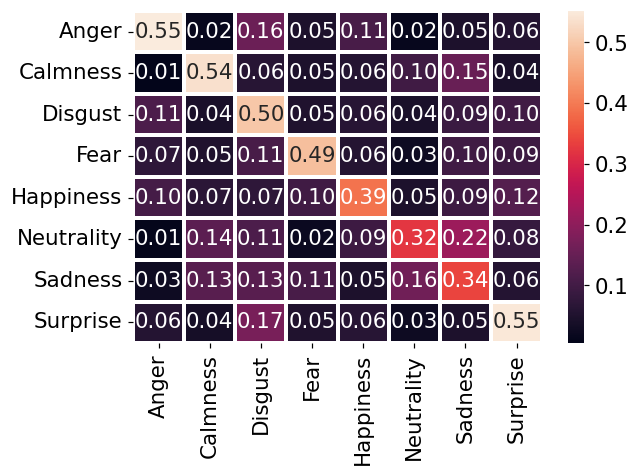

Saving confusion matrix with name:  confusion_matrix_LDA_full.jpg


In [56]:
model = LinearDiscriminantAnalysis()

UAR,y_pred,y_true,y_test = model_training.estimate_model(model, X_k_folds, y_k_folds)
# Confusion matrix
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred,image_path=f'confusion_matrix_LDA_full.jpg')

# Joint subset of features

100%|██████████| 5/5 [00:00<00:00, 10.79it/s]


UAR = 0.482


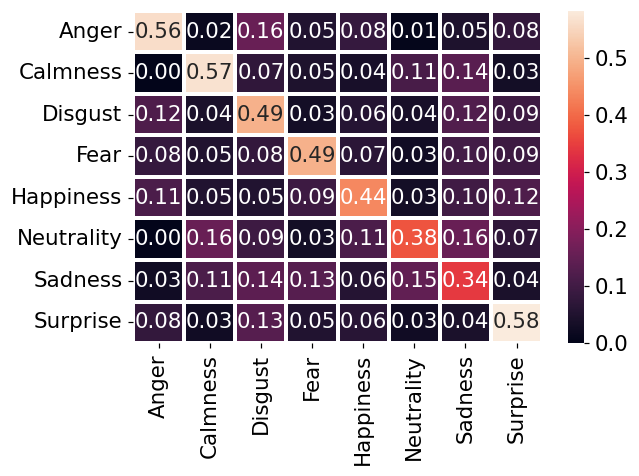

Saving confusion matrix with name:  confusion_matrix_LDA_joint_rev_features_uar_0.482.jpg


In [32]:
Emotions = ['happy','neutral','sad','calm','fear','disgust','surprised']
feature_joint_inds = []

for Emotion_label in Emotions:
    feature_ind = np.load(f'../data/feature_rev_LDA_idx_{Emotion_label}.npy')
    feature_joint_inds = np.unique(np.concatenate((feature_joint_inds, feature_ind)))

feature_joint_inds = feature_joint_inds.astype(int)

group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm[:,feature_joint_inds])
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)
model = LinearDiscriminantAnalysis()
UAR,y_pred,y_true,y_test = model_training.estimate_model(model, X_k_folds, y_k_folds)
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred,image_path=f'confusion_matrix_LDA_joint_rev_features_uar_{UAR:.3f}.jpg')